In [257]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE  # For imbalanced data
from sklearn.ensemble import RandomForestClassifier  # Initial model choice
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay,confusion_matrix

In [258]:
data = pd.read_csv("Cancer_Prediction.csv", encoding="utf-8")  # Replace with appropriate encoding if needed
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,...,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,NaN
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,...,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,NaN
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,...,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,NaN
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,...,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,NaN
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,...,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,NaN


In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [260]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

<Axes: >

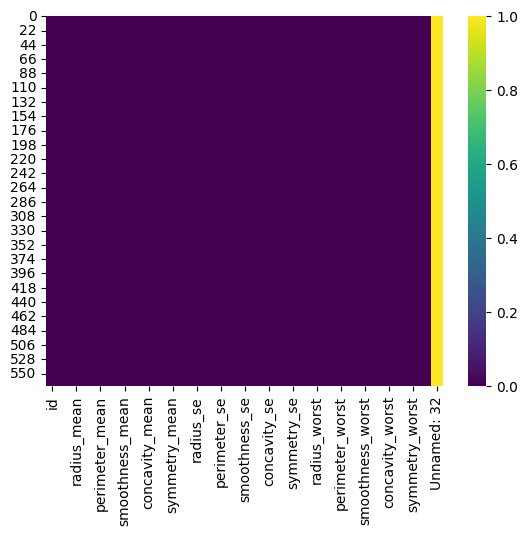

In [261]:
import seaborn as sns
sns.heatmap(data.isnull(), cmap='viridis') # Check for missing values

In [262]:
data.drop(columns=["id", "Unnamed: 32"], inplace=True)
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [263]:
import plotly.express as px

In [264]:
data.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

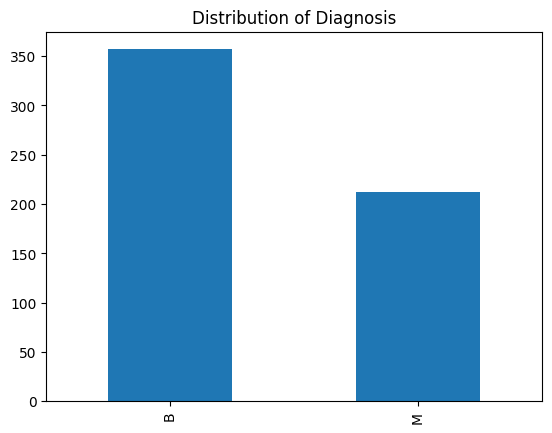

In [265]:
import matplotlib.pyplot as plt
data["diagnosis"].value_counts().plot(kind="bar")
plt.title("Distribution of Diagnosis")
plt.show()

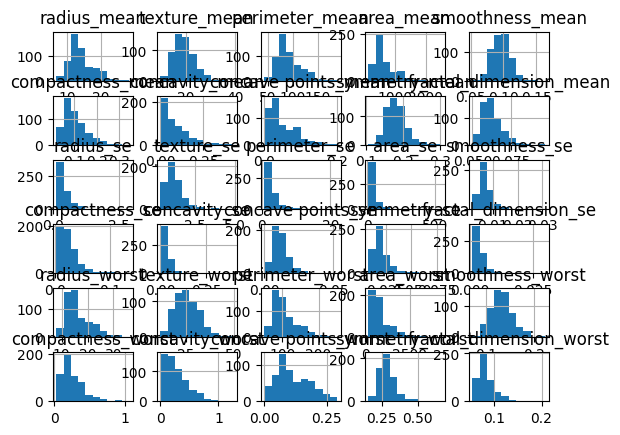

In [266]:
col = [data.columns]
for item in col:
    data[item].hist()

In [267]:
pd.get_dummies(data.diagnosis)

,B,M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
564,0,1
565,0,1
566,0,1
567,0,1


In [268]:
data.diagnosis = pd.get_dummies(data.diagnosis , drop_first=True).astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [269]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,...,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,...,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,1,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,...,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,1,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,1,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,...,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


In [270]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,...,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00,569.00
mean,0.37,14.13,19.29,91.97,654.89,0.10,0.10,0.09,0.05,0.18,...,16.27,25.68,107.26,880.58,0.13,0.25,0.27,0.11,0.29,0.08
std,0.48,3.52,4.30,24.30,351.91,0.01,0.05,0.08,0.04,0.03,...,4.83,6.15,33.60,569.36,0.02,0.16,0.21,0.07,0.06,0.02
min,0.00,6.98,9.71,43.79,143.50,0.05,0.02,0.00,0.00,0.11,...,7.93,12.02,50.41,185.20,0.07,0.03,0.00,0.00,0.16,0.06
25%,0.00,11.70,16.17,75.17,420.30,0.09,0.06,0.03,0.02,0.16,...,13.01,21.08,84.11,515.30,0.12,0.15,0.11,0.06,0.25,0.07
50%,0.00,13.37,18.84,86.24,551.10,0.10,0.09,0.06,0.03,0.18,...,14.97,25.41,97.66,686.50,0.13,0.21,0.23,0.10,0.28,0.08
75%,1.00,15.78,21.80,104.10,782.70,0.11,0.13,0.13,0.07,0.20,...,18.79,29.72,125.40,1084.00,0.15,0.34,0.38,0.16,0.32,0.09
max,1.00,28.11,39.28,188.50,2501.00,0.16,0.35,0.43,0.20,0.30,...,36.04,49.54,251.20,4254.00,0.22,1.06,1.25,0.29,0.66,0.21


In [271]:
data.corr()["diagnosis"]

diagnosis                  1.00
radius_mean                0.73
texture_mean               0.42
perimeter_mean             0.74
area_mean                  0.71
smoothness_mean            0.36
compactness_mean           0.60
concavity_mean             0.70
concave points_mean        0.78
symmetry_mean              0.33
fractal_dimension_mean    -0.01
radius_se                  0.57
texture_se                -0.01
perimeter_se               0.56
area_se                    0.55
smoothness_se             -0.07
compactness_se             0.29
concavity_se               0.25
concave points_se          0.41
symmetry_se               -0.01
fractal_dimension_se       0.08
radius_worst               0.78
texture_worst              0.46
perimeter_worst            0.78
area_worst                 0.73
smoothness_worst           0.42
compactness_worst          0.59
concavity_worst            0.66
concave points_worst       0.79
symmetry_worst             0.42
fractal_dimension_worst    0.32
Name: di

In [272]:
colu = ["radius_mean", "perimeter_mean", "area_mean", "concavity_mean", "concave points_mean", "fractal_dimension_se", "radius_worst", "perimeter_worst", "area_worst", "concave points_worst", "diagnosis"]
data = data[colu]

In [273]:
data.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,fractal_dimension_se,radius_worst,perimeter_worst,area_worst,concave points_worst,diagnosis
0,17.99,122.80,1001.00,0.30,0.15,0.01,25.38,184.60,2019.00,0.27,1
1,20.57,132.90,1326.00,0.09,0.07,0.00,24.99,158.80,1956.00,0.19,1
2,19.69,130.00,1203.00,0.20,0.13,0.00,23.57,152.50,1709.00,0.24,1
3,11.42,77.58,386.10,0.24,0.11,0.01,14.91,98.87,567.70,0.26,1
4,20.29,135.10,1297.00,0.20,0.10,0.01,22.54,152.20,1575.00,0.16,1


In [274]:
data.corr()["diagnosis"]

radius_mean            0.73
perimeter_mean         0.74
area_mean              0.71
concavity_mean         0.70
concave points_mean    0.78
fractal_dimension_se   0.08
radius_worst           0.78
perimeter_worst        0.78
area_worst             0.73
concave points_worst   0.79
diagnosis              1.00
Name: diagnosis, dtype: float64

In [275]:
X = data.drop("diagnosis", axis=1)
y = data.diagnosis
print(X.shape)
print(y.shape)

(569, 10)
(569,)


In [276]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (398, 10)
X_test (171, 10)
y_train (398,)
y_test (171,)


In [277]:
pip install lazypredict

In [278]:
from lazypredict.Supervised import LazyClassifier
lc = LazyClassifier()

In [279]:
models = lc.fit(X_train, X_test, y_train, y_test)

  7%|▋         | 2/29 [00:00<00:05,  4.73it/s]/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

 48%|████▊     | 14/29 [00:01<00:01, 11.35it/s]/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

100%|██████████| 29/29 [00:02<00:00, 12.23it/s]

[LightGBM] [Info] Number of positive: 149, number of negative: 249
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1325
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374372 -> initscore=-0.513507
[LightGBM] [Info] Start training from score -0.513507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [280]:
print(models)

(                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
PassiveAggressiveClassifier        0.98               0.98     0.98      0.98   
LinearSVC                          0.97               0.97     0.97      0.97   
ExtraTreesClassifier               0.97               0.97     0.97      0.97   
KNeighborsClassifier               0.97               0.97     0.97      0.97   
RidgeClassifierCV                  0.97               0.96     0.96      0.97   
LogisticRegression                 0.96               0.96     0.96      0.96   
CalibratedClassifierCV             0.97               0.96     0.96      0.97   
RidgeClassifier                    0.96               0.96     0.96      0.96   
LinearDiscriminantAnalysis         0.96               0.96     0.96      0.96   
LGBMClassifier                     0.96               0.95     0.95      0.96   
GaussianNB                 

In [281]:
from sklearn.linear_model import PassiveAggressiveClassifier
PAC = PassiveAggressiveClassifier()
PAC.fit(X_train, y_train)

PassiveAggressiveClassifier()

In [282]:
print("nb score = ", PAC.score(X_train, y_train))

nb score =  0.9045226130653267


In [283]:
y_pred = PAC.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", auc)

Accuracy: 0.935672514619883
Recall: 0.8253968253968254
F1 Score: 0.9043478260869565
AUC-ROC: 0.9126984126984127


In [284]:
confusion_matrix(y_test, PAC.predict(X_test))

array([[108,   0],
       [ 11,  52]])

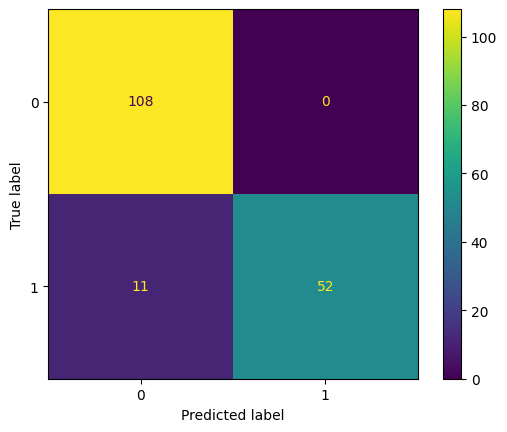

In [285]:
ConfusionMatrixDisplay(confusion_matrix(y_test, PAC.predict(X_test))).plot();

In [286]:
from sklearn.ensemble import ExtraTreesClassifier
EX = ExtraTreesClassifier()

In [287]:
EX.fit(X_train, y_train)

ExtraTreesClassifier()

In [288]:
print("EX score = ", EX.score(X_train, y_train))


EX score =  1.0


In [289]:
y_pred = EX.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC:", auc)


Accuracy: 0.9649122807017544
Recall: 0.9523809523809523
F1 Score: 0.9523809523809523
AUC-ROC: 0.9623015873015873


In [290]:
confusion_matrix(y_test, EX.predict(X_test))

array([[105,   3],
       [  3,  60]])

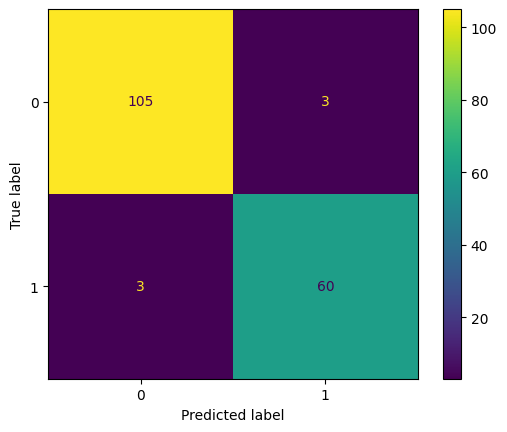

In [291]:
ConfusionMatrixDisplay(confusion_matrix(y_test, EX.predict(X_test))).plot();

In [292]:
data.head()

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,fractal_dimension_se,radius_worst,perimeter_worst,area_worst,concave points_worst,diagnosis
0,17.99,122.80,1001.00,0.30,0.15,0.01,25.38,184.60,2019.00,0.27,1
1,20.57,132.90,1326.00,0.09,0.07,0.00,24.99,158.80,1956.00,0.19,1
2,19.69,130.00,1203.00,0.20,0.13,0.00,23.57,152.50,1709.00,0.24,1
3,11.42,77.58,386.10,0.24,0.11,0.01,14.91,98.87,567.70,0.26,1
4,20.29,135.10,1297.00,0.20,0.10,0.01,22.54,152.20,1575.00,0.16,1


In [293]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [294]:
nb = GaussianNB()
knn  = KNeighborsClassifier()
svm = SVC()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [295]:
nb.fit(X_train, y_train)
knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [296]:
print("nb score = ", nb.score(X_train, y_train))
print("knn score = ", knn.score(X_train, y_train))
print("svm score = ", svm.score(X_train, y_train))
print("dt score = ", dt.score(X_train, y_train))
print("rf score = ", rf.score(X_train, y_train))

nb score =  0.9095477386934674
knn score =  0.9296482412060302
svm score =  0.9095477386934674
dt score =  1.0
rf score =  0.9974874371859297


In [297]:
print("nb Test scorre(accurancy scorre) = ", accuracy_score(y_test, nb.predict(X_test)))
print("knn Test scorre(accurancy scorre) = ", accuracy_score(y_test, knn.predict(X_test)))
print("svm Test scorre(accurancy scorre) = ", accuracy_score(y_test, svm.predict(X_test)))
print("dt Test scorre(accurancy scorre) = ", accuracy_score(y_test, dt.predict(X_test)))
print("rf Test scorre(accurancy scorre) = ", accuracy_score(y_test, rf.predict(X_test)))

nb Test scorre(accurancy scorre) =  0.9649122807017544
knn Test scorre(accurancy scorre) =  0.9590643274853801
svm Test scorre(accurancy scorre) =  0.9415204678362573
dt Test scorre(accurancy scorre) =  0.9239766081871345
rf Test scorre(accurancy scorre) =  0.9590643274853801


In [298]:
confusion_matrix(y_test, nb.predict(X_test))

array([[107,   1],
       [  5,  58]])

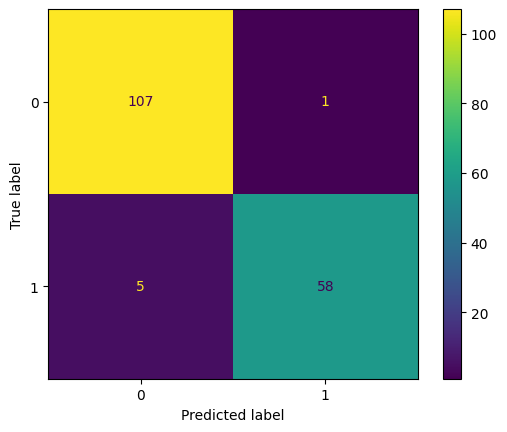

In [299]:
ConfusionMatrixDisplay(confusion_matrix(y_test, nb.predict(X_test))).plot();

In [300]:
confusion_matrix(y_test, knn.predict(X_test))

array([[106,   2],
       [  5,  58]])

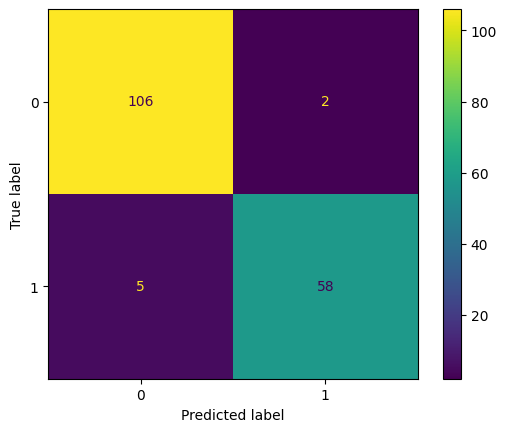

In [301]:
ConfusionMatrixDisplay(confusion_matrix(y_test, knn.predict(X_test))).plot();

In [302]:
confusion_matrix(y_test, svm.predict(X_test))

array([[107,   1],
       [  9,  54]])

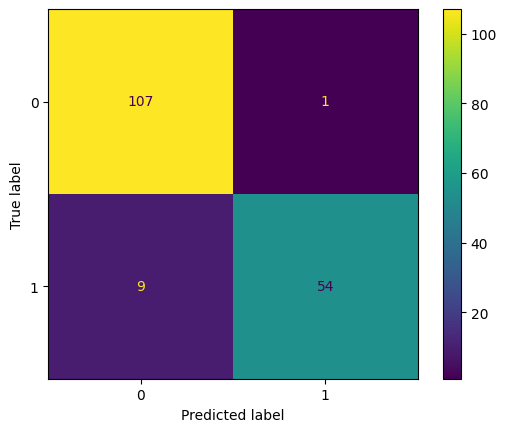

In [303]:
ConfusionMatrixDisplay(confusion_matrix(y_test, svm.predict(X_test))).plot();

In [304]:
confusion_matrix(y_test, dt.predict(X_test))

array([[103,   5],
       [  8,  55]])

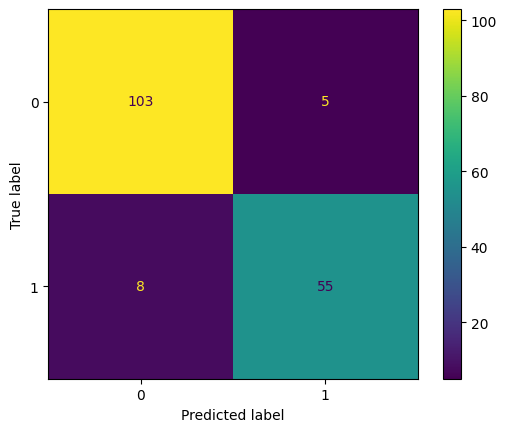

In [305]:
ConfusionMatrixDisplay(confusion_matrix(y_test, dt.predict(X_test))).plot();

In [306]:
confusion_matrix(y_test, rf.predict(X_test))

array([[104,   4],
       [  3,  60]])

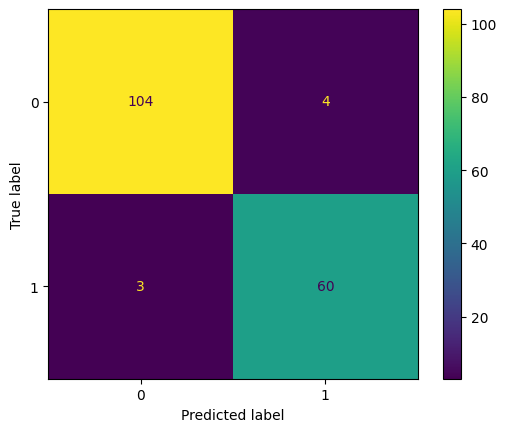

In [307]:
ConfusionMatrixDisplay(confusion_matrix(y_test, rf.predict(X_test))).plot();

In [308]:
modele = EX

In [309]:
data.to_csv("mod_cans_pred.csv")

In [310]:
data.columns

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'fractal_dimension_se', 'radius_worst',
       'perimeter_worst', 'area_worst', 'concave points_worst', 'diagnosis'],
      dtype='object')

In [311]:
data.head(1)

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,fractal_dimension_se,radius_worst,perimeter_worst,area_worst,concave points_worst,diagnosis
0,17.99,122.80,1001.00,0.30,0.15,0.01,25.38,184.60,2019.00,0.27,1


In [315]:
data_dict = {
    'radius_mean': 20.10,
    'perimeter_mean': 200.90,
    'area_mean': 2000.10,
    'concavity_mean': 0.60,
    'concave points_mean': 2.0,
    'fractal_dimension_se': 0.02,
    'radius_worst': 40.40,
    'perimeter_worst': 200.20,
    'area_worst': 2030.00,
    'concave points_worst': 0.60,
}


In [316]:
data_dict

{'radius_mean': 20.1,
 'perimeter_mean': 200.9,
 'area_mean': 2000.1,
 'concavity_mean': 0.6,
 'concave points_mean': 2.0,
 'fractal_dimension_se': 0.02,
 'radius_worst': 40.4,
 'perimeter_worst': 200.2,
 'area_worst': 2030.0,
 'concave points_worst': 0.6}

In [317]:
index = [0]
# Create the DataFrame
df = pd.DataFrame(data_dict, index=index)
df

,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,fractal_dimension_se,radius_worst,perimeter_worst,area_worst,concave points_worst
0,20.10,200.90,2000.10,0.60,2.00,0.02,40.40,200.20,2030.00,0.60


In [318]:
modele.predict(df)

array([1])

In [313]:
import joblib

In [314]:
data = joblib.dump(value=modele, filename="model_cans_pred.plk")